# $k$ Nearest Neighbors Classifier

In this notebook will be some additional problems regarding the $k$-nearest neighbors classifier. This material corresponds to `Lectures/Supervised Learning/Classification/2. k Nearest Neighbors Classifier`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### 1. The "perfect" iris classifier

##### a.

Load the iris data set, then perform a train test split. Fit a $k$-nearest neighbors classifier on the training data with $k=1$. What is the accuracy of this model on the training set?

In [2]:
## to get the iris data
from sklearn.datasets import load_iris

## import train_test_split
from sklearn.model_selection import train_test_split

## Load the data
iris = load_iris()
iris_df = pd.DataFrame(iris['data'],columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['iris_class'] = iris['target']

## Making the split
iris_train, iris_test = train_test_split(iris_df, 
                                            random_state=431,
                                            shuffle=True,
                                            test_size=.2,
                                            stratify=iris_df['iris_class'])

In [4]:
## code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
## code here

knn = KNeighborsClassifier(1)

knn.fit(iris_train[['sepal_length','sepal_width','petal_length','petal_width']],iris_train.iris_class)

KNeighborsClassifier(n_neighbors=1)

In [11]:
## code here

accuracy_score(iris_train.iris_class,knn.predict(iris_train[['sepal_length','sepal_width','petal_length','petal_width']]))


1.0

##### b.

The training accuracy of a $k$-nearest neighbors model with $k=1$ is always $1$, why is that?

##### Write here




##### 2. Bias-Variance Tradeoff for KNN

With $k$-nearest neighbors the complexity of the model is primarily controlled by the number of neighbors, $k$, considered when making a prediction.

Which model do you expect to have the highest variance and which one do you expect to have the highest bias:
- A model with $k=1$,
- A model with $k=n$, where $n$ is the number of observations in the training set?

In general which direction should you move $k$ to increase the bias, which direction to increase the variance?

##### Write here




##### 3. Weighted Votes

Sometimes it may be preferable to weight the votes, meaning that some of the $k$-nearest neighbors get more of a say in the predicted class. One common way to weight votes is by the inverse of the distance to the point you are trying to predict.

Suppose you want to predict an output variable, $y$, with $\mathcal{C}$ possible classes, using the $k$-nearest neighbors algorithm with a distance metric denoted with a $d$ (a standard choice is the euclidean distance $d(a,b) = \sqrt{\sum_{i=1}^m (a_i - b_i)^2}$ for two vectors $a,b \in \mathbb{R}^m$). Then the weighted version of $k$NN predicts that a new point $X^*$ would be the class $l$ for which:

$$
v_l = \sum_{i \in \mathcal{N}(X^*)} \frac{1}{d(X^*, X_i)} 1_{\left\lbrace y_i = l\right\rbrace},
$$

where $\mathcal{N}(X^*)$ is the set of training points representing the $k$-nearest neighbors of $X^*$ and $1_{\left\lbrace y_i = l\right\rbrace}$ is $1$ when $y_i = l$ and $0$ when $y_i\neq l$.

For the iris data set perform cross-validation to investigate whether weighted $k$NN outperforms unweighted $k$NN in terms of the accuracy. Do this for $k=1,\dots,10$.

Look at the `KNeighborsClassifier` documentation, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html</a> to see how to implement weighted $k$NN. 

In [12]:
## code here
from sklearn.model_selection import StratifiedKFold


In [18]:
## code here
kfold = StratifiedKFold(n_splits=5,
                           shuffle=True,
                           random_state=1560)

In [19]:
## code here
neighbors = range(1,11)

kcvs = np.zeros((5,len(neighbors)))
wkcvs = np.zeros((5,len(neighbors)))

i = 0
for train_idx, test_idx in kfold.split(iris_train[['sepal_length','sepal_width','petal_length','petal_width']],
                                       iris_train.iris_class):
    
    iris_tt = iris_train.iloc[train_idx]
    iris_ho = iris_train.iloc[test_idx]
    
    j = 0
    
    for n in neighbors:
        
        knn = KNeighborsClassifier(n)
        wknn = KNeighborsClassifier(n,weights='distance')
        
        knn.fit(iris_tt[['sepal_length','sepal_width','petal_length','petal_width']],iris_tt.iris_class)
        wknn.fit(iris_tt[['sepal_length','sepal_width','petal_length','petal_width']],iris_tt.iris_class)
        
        kcvs[i,j] = accuracy_score(iris_ho.iris_class,knn.predict(iris_ho[['sepal_length','sepal_width','petal_length','petal_width']]))
        wkcvs[i,j] = accuracy_score(iris_ho.iris_class,wknn.predict(iris_ho[['sepal_length','sepal_width','petal_length','petal_width']]))
        
        j += 1
        
    i += 1


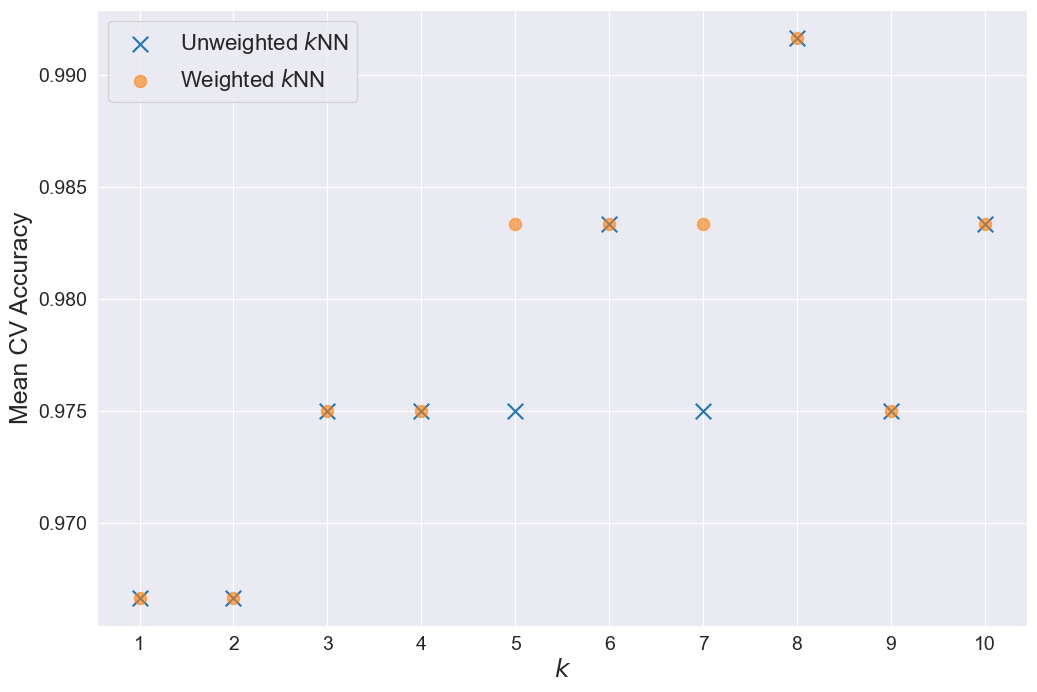

In [20]:
## code here
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))

plt.scatter(neighbors, np.mean(kcvs, axis=0), label="Unweighted $k$NN", s=125, alpha=1, marker='x')
plt.scatter(neighbors, np.mean(wkcvs, axis=0), label="Weighted $k$NN", s=75, alpha=.6)

plt.xticks(neighbors, fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("$k$", fontsize=18)
plt.ylabel("Mean CV Accuracy", fontsize=18)
plt.legend(fontsize=16)

plt.show()



##### 4. Training and prediction times

How is the training time for $k$-nearest neighbors impacted by the size of the training set, $n$, that is, as $n$ gets larger what happens to the training time?


What happens to the prediction time, the time it takes for the algorithm to make a prediction, as $n$ gets larger?

##### Write here





--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)